In [1]:
import pandas as pd
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torch.optim import lr_scheduler
from torch.autograd import Variable
from torch.utils.data import DataLoader, Dataset

from torchvision import transforms
from torchvision.utils import make_grid

import math
import random

from PIL import Image, ImageOps, ImageEnhance
import numbers

import matplotlib.pyplot as plt
%matplotlib inline

## Explore the Data

The data has 28x28=274 pixel, each of those pixel's value ranges from 0 to 255
The set has 10 calsses in total, we want to reduce it to 2 (only 1's and 0's)

In [2]:
train_df = pd.read_csv('./train.csv')

n_train = len(train_df)
n_pixels = len(train_df.columns) - 1
n_class = len(set(train_df['label']))

print("Number of training samples:",n_train)
print('Number of training pixels: ', n_pixels)
print('Number of classes: ', n_class)

Number of training samples: 42000
Number of training pixels:  784
Number of classes:  10


In [3]:
test_df = pd.read_csv('./test_labeled.csv', sep=";")

n_test = len(test_df)
n_pixels = len(test_df.columns) - 1
n_class = len(set(test_df['label']))

print("Number of training samples:",n_test)
print('Number of training pixels: ', n_pixels)
print('Number of classes: ', n_class)

Number of training samples: 28000
Number of training pixels:  784
Number of classes:  10


## To Extract Only 2 Classes

In [20]:
def extract_DF(df, label):
    temp = df.loc[df['label'] < label+1]
    return temp.loc[temp['label'] > label-1]

In [31]:
class_ = 0
a = extract_DF(test_df, class_)
print(a.head(10))

    label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
1       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
6       0       0       0       0       0       0       0       0       0   
8       0       0       0       0       0       0       0       0       0   
13      0       0       0       0       0       0       0       0       0   
19      0       0       0       0       0       0       0       0       0   
59      0       0       0       0       0       0       0       0       0   
63      0       0       0       0       0       0       0       0       0   
64      0       0       0       0       0       0       0       0       0   
65      0       0       0       0       0       0       0       0       0   

    pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
1        0  ...         0         0         0         0         0        

(-0.5, 211.5, 61.5, -0.5)

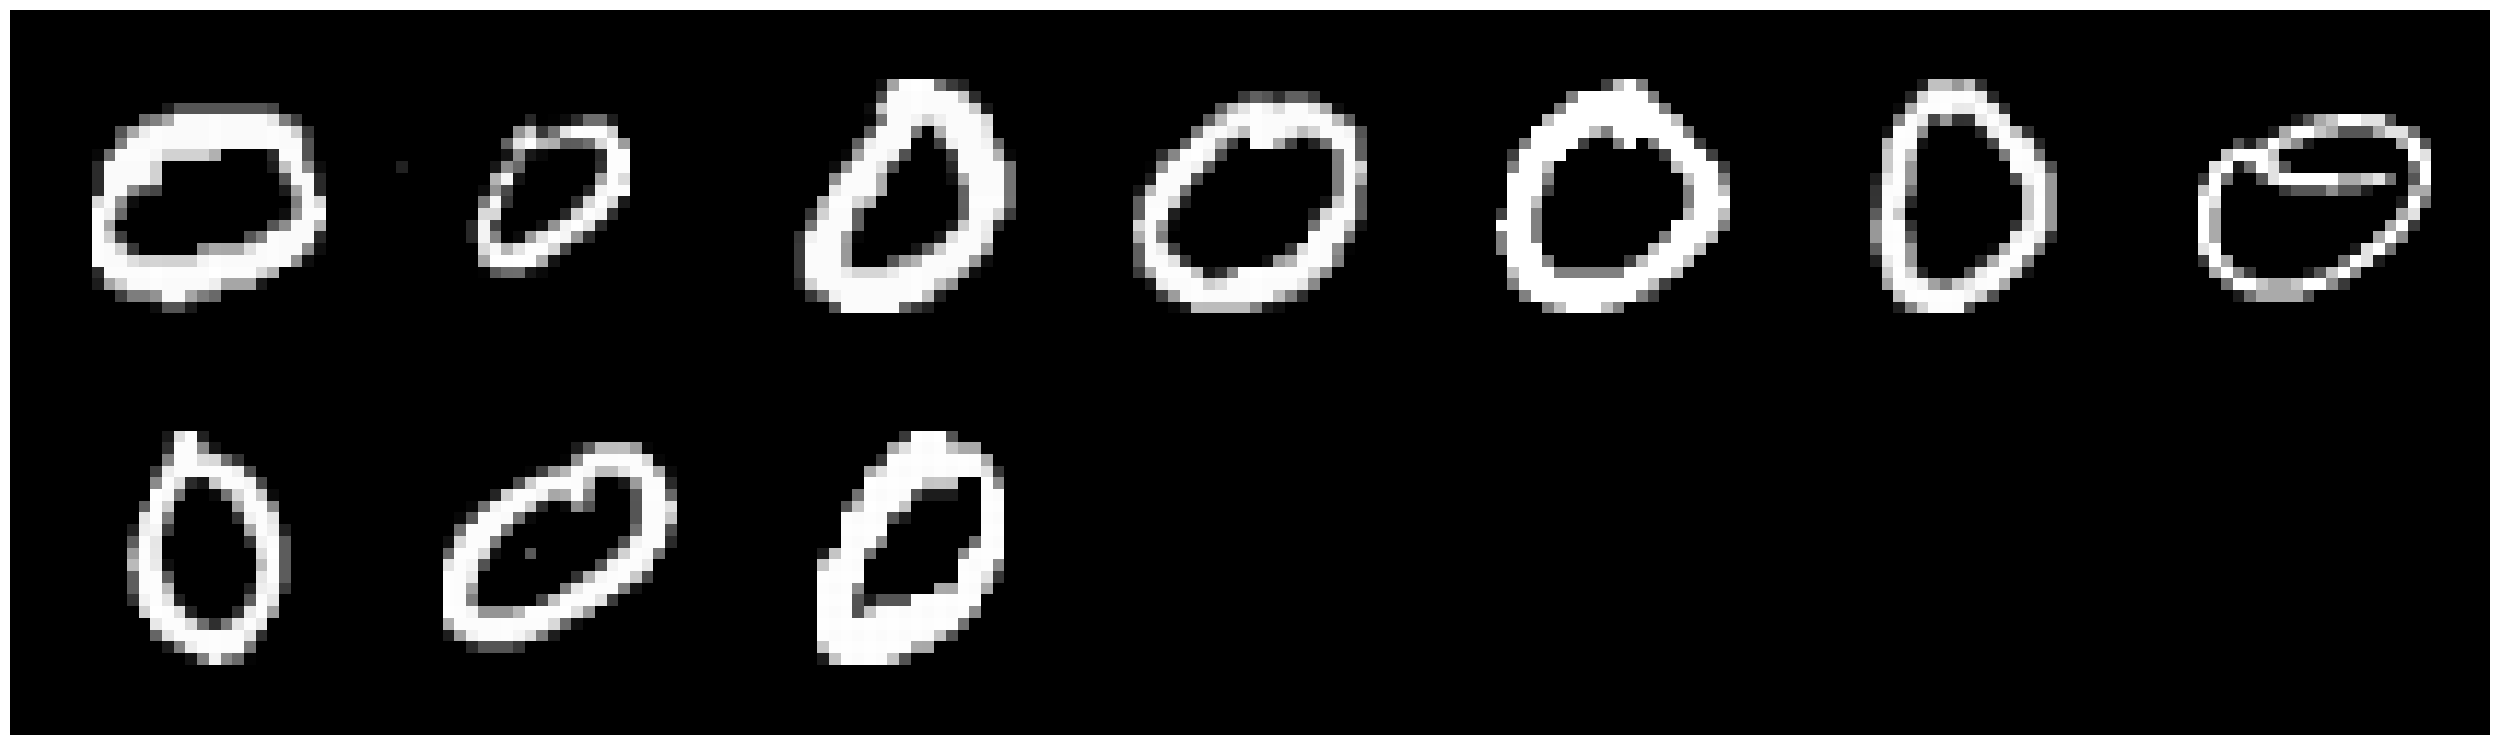

In [32]:
random_sel = np.random.randint(n_binary, size=14)
#print(random_sel)

grid = make_grid(torch.Tensor((a.iloc[0:10, 1:].to_numpy()/255.).reshape((-1, 28, 28))).unsqueeze(1), nrow=7)
plt.rcParams['figure.figsize'] = (32, 150)
plt.imshow(grid.numpy().transpose((1,2,0)))
plt.axis('off')

### Run Below Cell to Save the New DataFrame

In [33]:
a.to_csv(str(class_)+'_test.csv')

## Binary Extarction

In [4]:
binary_df = train_df.loc[train_df['label'] > 7]

n_binary = len(binary_df)
n_pixels = len(binary_df.columns) - 1
n_class = len(set(binary_df['label']))

print("Number of training samples:",n_binary) #{0}'.format(n_train))
print("Number of training pixels: ", n_pixels)
print("Number of classes: ", n_class)

print("Shape of the binary_df is: ", binary_df.shape)

Number of training samples: 8251
Number of training pixels:  784
Number of classes:  2
Shape of the binary_df is:  (8251, 785)


In [10]:
train_df.loc[train_df['label'] > 7].to_csv('98_train.csv')
test_df.loc[test_df['label'] > 7].to_csv('98_test.csv')

In [ ]:
labeled_df = pd.read_csv('./test_labeled.csv', sep = ';') # default seperator is ','

In [ ]:
n_labeled = len(labeled_df)
n_pixels = len(labeled_df.columns) - 2
n_class = len(set(labeled_df['label']))

print("Number of training samples:",n_labeled)
print('Number of training pixels: ', n_pixels)
print('Number of classes: ', n_class)

In [ ]:
temp = labeled_df.loc[labeled_df['label'] < num1]
b = temp.loc[temp['label'] > num2]
print(b)

In [ ]:
binary_test_df = labeled_df.loc[labeled_df['label'] < 2]

n_binary_test = len(binary_test_df)
n_pixels = len(binary_test_df.columns) - 2
n_class = len(set(binary_test_df['label']))

print("Number of training samples:",n_binary_test) #{0}'.format(n_train))
print("Number of training pixels: ", n_pixels)
print("Number of classes: ", n_class)

print("Shape of the binary_df is: ", binary_test_df.shape)

In [ ]:
random_sel = np.random.randint(n_binary_test, size=14)
#print(random_sel)

grid = make_grid(torch.Tensor((binary_test_df.iloc[0:10, 2:].to_numpy()/255.).reshape((-1, 28, 28))).unsqueeze(1), nrow=7)
plt.rcParams['figure.figsize'] = (32, 150)
plt.imshow(grid.numpy().transpose((1,2,0)))
plt.axis('off')

In [ ]:
six_eight_df = pd.read_csv('./6_8_train.csv')

n_se = len(six_eight_df)
n_pixels = len(six_eight_df.columns) - 1
n_class = len(set(six_eight_df['label']))

print("Number of training samples:",n_train) #{0}'.format(n_train))
print('Number of training pixels: ', n_pixels)
print('Number of classes: ', n_class)

In [ ]:
random_sel = np.random.randint(n_se, size=14)
#print(random_sel)

grid = make_grid(torch.Tensor((six_eight_df.iloc[random_sel, 2:].to_numpy()/255.).reshape((-1, 28, 28))).unsqueeze(1), nrow=7)
plt.rcParams['figure.figsize'] = (32, 150)
plt.imshow(grid.numpy().transpose((1,2,0)))
plt.axis('off')

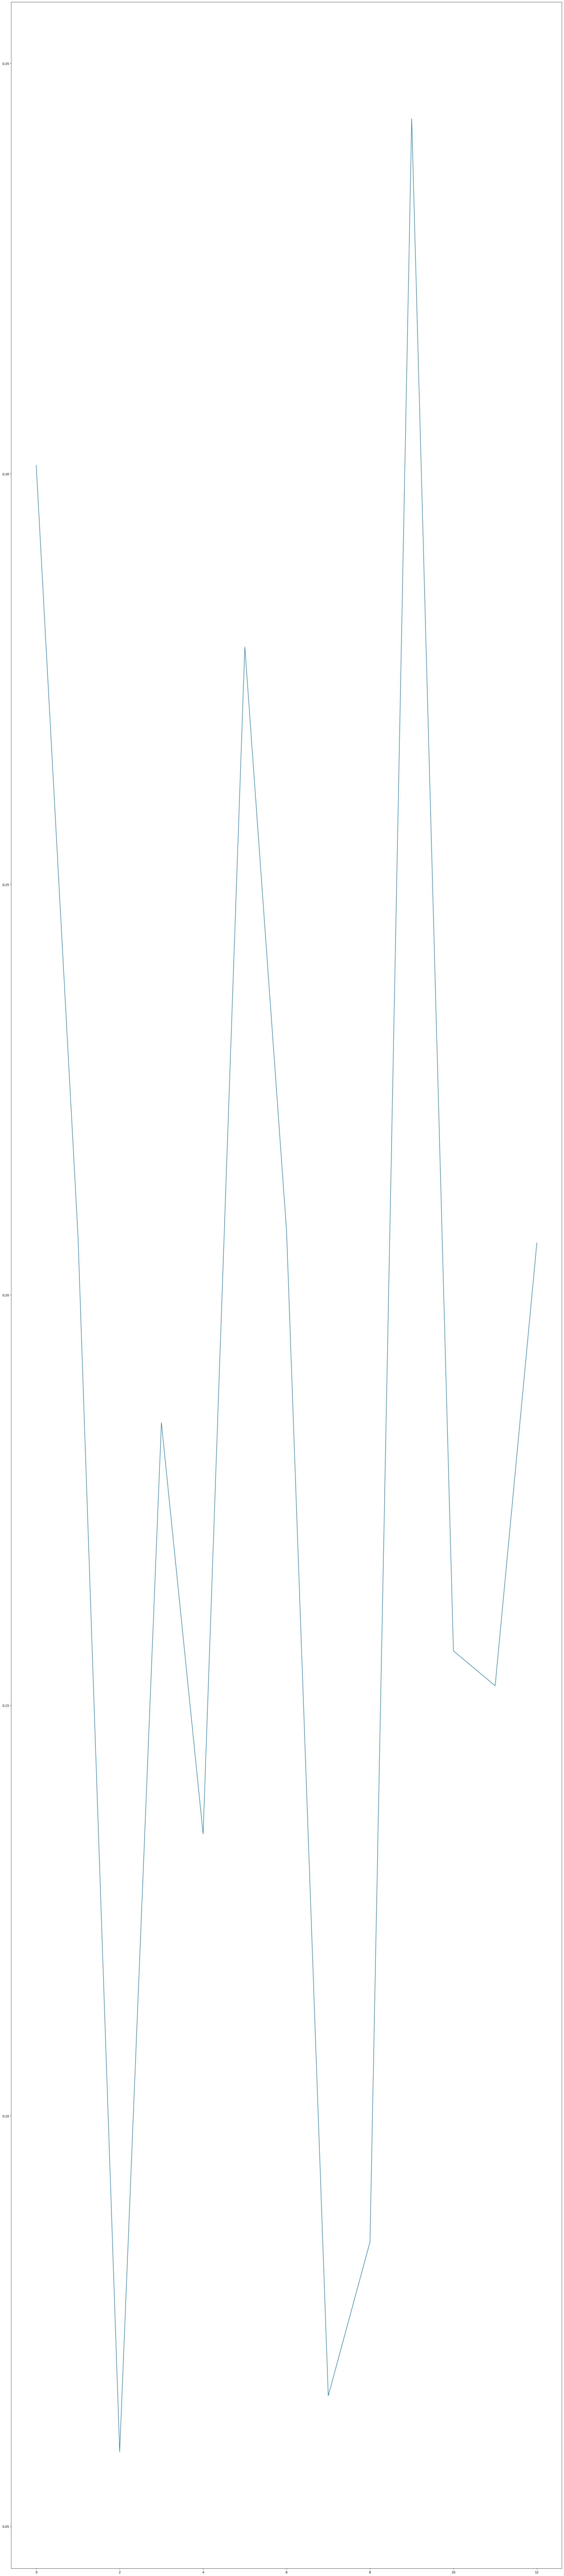

In [35]:
loss = [0.301064,
0.207287,
0.059080,
0.184439,
0.134344,
0.278921,
0.207809,
0.065915,
0.084643,
0.343272,
0.156644,
0.152393,
0.206352]
plt.plot(loss)
plt.show()